In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
plt.style.use('ggplot')

# TOC
- Purpose
- Aquisition of Data
    - Great Schools Rating Data
    - Student Test Score Data
    - Income Data
    - Demographic Data
- Inspecting and Cleaning Data
    - Great Schools
    - Income Data
    - Demographic Data
- Combing Data and Prepaing for Analysis
    - Great Schools and Income
    - Great Schools, Income, and Demographics
- Analysis
- Conclusion


# Purpose

[GreatSchools](https://www.greatschools.org/) is the most popular ‘school ranking’ site for parents seeking information about public schools in the PK-12 space. Recently, GreatSchools has been criticized by education advocates for, “effectively penaliz[ing] schools that serve largely low-income students and those serving largely black and Hispanic students,” by giving these schools, “significantly lower ratings than schools serving more affluent and more white and Asian students [(source)](https://chalkbeat.org/posts/us/2019/12/05/greatschools-ratings-poverty-race-segregation-housing/).”

While I'm unconvinced by this analysis that GreatSchools is responsible for adversely influencing property values, as a former educator that has spent the majority of his career working with low-income schools, I am interested to see what factors are correlated with Great Schools' ratings. So, I dug into their data to see what I could find.

# Acquisition

## GreatSchools

I chose to scrape the site https://www.greatschools.org/, a popular school ratings site, to acquire GreatSchools' rating out of 10 for all schools in New York State. In the process, I wanted to snag whatever else I could get from GreatSchools about each school they've rated.

The site features multiple javascript ads that wouldn't allow me to use scrapy, so I had to write a Selieum script. Uncomment the code below to run the script.

In the end, I was only able to scrape 131 of 589 pages of New York schools before my IP was banned, but all of the New York schools with a rating were included in my scrape. While I'd have love to gotten all pages, over 80% of the New York schools listed on the site are unrated, and of these unrated schools, most are private schools. I got what I needed for the analysis at hand.

In [6]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# import csv
# import re
# import time


# # establish a connection with chrome via my terminal
# driver = webdriver.Chrome()

# # go to greatschools.org
# driver.get("https://www.greatschools.org/new-york/schools/?page=1")

# csv_file = open('great_schools_nys_NEW.csv', 'w', encoding='utf-8', newline='')
# writer = csv.writer(csv_file)
# # wait because the site is slow
# # wait_loading = WebDriverWait(driver, 10)

# # loop through all pages, there are 589
# index = 1
# while index < 590:
#     try:
#         print('\n')
#         print("Scraping Page number " + str(index))
#         print("+"*48)
#         index += 1
       
#         wait_rating = WebDriverWait(driver, 30)
#         ratings = wait_rating.until(EC.presence_of_all_elements_located((By.XPATH,'//ol/li[@class=" unsaved"]')))
        
        
#         for rating in ratings:
#             rating_dict = {}
#             time.sleep(1)

#             try: 
#                 gs_rating = rating.find_element_by_xpath('.//*[contains(@class, "circle-rating")]').text
#                 print(gs_rating)
#             except:
#                 gs_rating = rating.find_element_by_xpath('.//*[contains(@alt, "Owl ")]').text
#                 print(gs_rating)
            
#             try:
#                 school_name = rating.find_element_by_xpath('.//a[@class="name"]').text
#                 print(school_name)
#             except:
#                 continue

#             try:
#                 school_address = rating.find_element_by_xpath('.//div[@class="address"]').text
#                 print(school_address)
#             except:
#                 continue

#             try:
#                 type_and_grades = rating.find_element_by_xpath('.//div/span[@class="open-sans_sb"]').text
#                 print(type_and_grades)
#             except:
#                 continue

#             try:
#                 total_students = rating.find_element_by_xpath('.//span/span[@class="open-sans_sb"]').text
#                 print(total_students)
#                 print("-"*12)
#             except:
#                 continue   
            
#             rating_dict['gs_rating'] = gs_rating
#             rating_dict['school_name'] = school_name
#             rating_dict['school_address'] = school_address
#             rating_dict['type_and_grades'] = type_and_grades
#             rating_dict['total_students'] = total_students

#             writer.writerow(rating_dict.values())

#          # need to scroll to the bottom of the page because the button is not in the current view yet.
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         time.sleep(.5)
        
#         wait_next = WebDriverWait(driver, 10)
#         next_page = wait_next.until(EC.element_to_be_clickable((By.XPATH,'//*[contains(@class, "anchor-button   anchor-button")][last()]')))
#         next_page.click()
#         time.sleep(1)

#     except Exception as e:
#         print(e)
#         csv_file.close()
#         driver.close()
#         break



## Student Test Data

Initially I had planned to merge the data I scraped from Great Schools with test score data that can be downloaded here, https://data.nysed.gov/downloads.php. I download middle school and regent test scores for all schools in NYS for two consecutive years so that I could clean this data and then match it, by school. However, once I did the clean up and tried to merge by school name, less than 25% of the school names matched between datasets, and there were no clear pattern that could be followed to do a quick clean up.

I decided to scrap the idea of matching the GreatSchools data with test scores becuase of time constraints. This sent me on a number of detours while looking for other data that I could use to draw more intersting insights about Great Schools' ratings than I could if I were working only with my scraped data.

## Income Data

The data I scraped from GreatSchools contained each school's address, including its zip code. Because I couldn't match the GreatSchools data with other test score data from New York State, I instead found a data set from the US Treasury that contained data about tax returns by zip code. The dataset can be downloaded here, https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2017-zip-code-data-soi

## Demographic Data

I searched all corners of the internet for datasets that contained demographic info by zip code, but my efforts were in vain. The closest I got was using the API provided by the Census Bureau's American FactFinder site (example URL, don't call it...https://api.census.gov/data/2018/acs/acs5/profile?get=DP05_0037PE&for=zip%20code%20tabulation%20area:*&key=de1ebf40814b5be46e7920918d9c2c525c71bbd9)

In theory I could write a Selenium script that could run a few thousand queries to the American FactFinder site, but I didn't feel that would be practical for me. Instead, I coughed up $10 to buy zipcode info about all New York State zip codes from, https://www.cdxtech.com/tools/bulk/demographics/download/

# Inspection & Cleaning

## GreatSchools

While pasting my Selenium script above, I accidently reran it, and my original GreatSchools data file was overwritten. Thankfully I saved the clean version of the data as a csv and used this when combining datasets in the steps below, but to show how I cleaned the original data, I've entered my code below.

In [12]:
gs_nys = pd.read_csv('great_schools_nys.csv') # No longer available

In [ ]:
# Edited column headers
gs_nys.columns=['rating','school', 'address', 'type', 'students']

# Addresses were originally formated as street, city, zip
# I broke these up into 3 separate columns and saved them as a new dataframe
df_address = gs_nys['address'].apply(lambda x: pd.Series(str(x).split(',')))

# There were a small number of schools' addresses that contained an out-place-comma
# Inspected using the code below
df_address.shape
np.sum(df_address.isnull())

# The last two columns in this dataframe represent rows that have mistakes in their address.
# I renamed the columns and noted the columns that I would drop later on.
df_address.columns=['street_address','city','state','zip','mistake1','mistake2']

# Then I merged this dataframe with the original on their indices and saved it as a new dataframe.
gs_nys2 = pd.merge(gs_nys, df_address, how='left', left_index=True, right_index=True)

# I renamed the columns
gs_nys2.columns = ['rating','school','address','type','students','street_address','city','state','zip','mis_address1','mis_address2']

# Next, I repeated the process above for the column type, which originally combined the grades served
# by the school with a string that stated whether the school is a district school or charter school.
# These steps are summarized below.
df_type = gs_nys2['type'].apply(lambda x: pd.Series(str(x).split(',')))
df_type.shape
np.sum(df_type.isnull())
df_type.columns = ['school_type','grades','mis_type1','mis_type2','mis_type3']
gs_nys3 = pd.merge(gs_nys2, df_type, how='left', left_index=True, right_index=True)
gs_nys3.head()

# I then repeated this process a third time for the column ratings, which originally was expressed
# as a score/10. I wanted to remove the '/10' portion of the rating.
df_rating = gs_nys3['rating'].apply(lambda x: pd.Series(str(x).split('/')))
df_rating.shape
np.sum(df_rating.isnull())
df_rating.columns=['rating','tbd_out_of_ten']
gs_nys4 = pd.merge(gs_nys3, df_rating, how='left', left_index=True, right_index=True)

# Once each cell contained a single value, I dropped the columns I woudn't need.
gs_nys5 = gs_nys4.drop(['tbd_rating', 'tbd_address', 'tbd_type', 'tbd_out_of_ten'], axis=1)

# Next, I did some exploring of this dataframe to see which row was the first for a school
# that wasn't rated. I then sliced this dataframe to include only schools with ratings. This 
# was then saved as a new dataframe, gs_nys6
gs_nys6 = gs_nys5[0:4351]

# Then I dropped more undneeded cells and did some more column title clean up
gs_nys7 = gs_nys6.drop(['street_address','state','mis_address1', 'mis_address2', 'mis_type1', 'mis_type2', 'mis_type3'], axis=1)
gs_nys7 = gs_nys7[['school','rating','type','students','grades','city','zip']]

# Lastly, I saved this cleaned data to a new csv file. This was the smartest thing I did during this whole project.
gs_nys7.to_csv('great_schools_nys_cleaned1.csv') 

## Income Data

In [3]:
income = pd.read_csv('income_17_no_agi_classes.csv')

In [4]:
# The original dataset included info for every zip code, but I only wanted those for NY.
# I inspected the file and deleted the rows for any state other than NY.
income.head()
income.shape
income_ny = income[income.values  == "NY"]
list(income_ny['STATE'].unique())

['NY']

In [6]:
# I then needed to isolate the columns I wanted to keep. I referenced the IRS documentation
# and changed the column names for the columns I wanted to keep from a reference code to a
# descriptive name. Then, I dropped the unwanted columns.
income_ny.columns.tolist()
income_ny.columns = ['STATEFIPS', 'state', 'zipcode', 'DELETE', 'returns', 'single_returns', 'joint_returns',\
                     'hoh_returns', 'ELF', 'CPREP', 'PREP', 'DIR_DEP', 'N2', 'NUMDEP', 'TOTAL_VITA', 'VITA',\
                     'TCE', 'VITA_EIC', 'RAC', 'ELDERLY', 'agi', 'N02650', 'total_income', 'N00200', 'A00200',\
                     'N00300', 'A00300', 'N00600', 'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900',\
                     'A00900', 'N01000', 'A01000', 'N01400', 'A01400', 'N01700', 'A01700', 'SCHF', 'N02300',\
                     'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900', 'N03220',\
                     'educator_expense_amount', 'N03300', 'A03300', 'N03270', 'A03270', 'N03150', 'A03150',\
                     'N03210', 'A03210', 'N03230', 'A03230', 'N03240', 'A03240', 'returns_itemized', 'A04470',\
                     'A00101', 'N17000', 'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500',\
                     'N18800', 'A18800', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 'A19500', 'N19530',\
                     'A19530', 'N19550', 'A19550', 'N19570', 'A19570', 'N19700', 'charitable_contributions',\
                     'N20800', 'A20800', 'N20950', 'A20950', 'N04800', 'A04800', 'N05800', 'A05800', 'N09600',\
                     'A09600', 'N05780', 'A05780', 'N07100', 'A07100', 'N07300', 'A07300', 'N07180', 'A07180',\
                     'N07230', 'A07230', 'N07240', 'A07240', 'N07220', 'A07220', 'N07260', 'A07260', 'N09400',\
                     'A09400', 'N85770', 'A85770', 'N85775', 'A85775', 'N09750', 'A09750', 'N10600', 'A10600',\
                     'N59660', 'A59660', 'N59720', 'A59720', 'N11070', 'A11070', 'N10960', 'A10960', 'N11560',\
                     'A11560', 'N06500', 'A06500', 'N10300', 'A10300', 'N85530', 'A85530', 'N85300', 'A85300',\
                     'N11901', 'A11901', 'N11900', 'A11900', 'N11902', 'A11902', 'N12000', 'A12000']
income_ny_2 = income_ny.drop(['STATEFIPS', 'DELETE', 'ELF', 'CPREP', 'PREP', 'DIR_DEP', 'N2', 'NUMDEP', 'TOTAL_VITA',\
                              'VITA', 'TCE', 'VITA_EIC', 'RAC', 'ELDERLY', 'N02650', 'N00200', 'A00200', 'N00300',\
                              'A00300', 'N00600', 'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900',\
                              'A00900', 'N01000', 'A01000', 'N01400', 'A01400', 'N01700', 'A01700', 'SCHF',\
                              'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900',\
                              'N03220', 'N03300', 'A03300', 'N03270', 'A03270', 'N03150', 'A03150', 'N03210',\
                              'A03210', 'N03230', 'A03230', 'N03240', 'A03240', 'A04470', 'A00101', 'N17000',\
                              'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500', 'N18800',\
                              'A18800', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 'A19500', 'N19530',\
                              'A19530', 'N19550', 'A19550', 'N19570', 'A19570', 'N19700', 'N20800', 'A20800',\
                              'N20950', 'A20950', 'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A09600',\
                              'N05780', 'A05780', 'N07100', 'A07100', 'N07300', 'A07300', 'N07180', 'A07180',\
                              'N07230', 'A07230', 'N07240', 'A07240', 'N07220', 'A07220', 'N07260', 'A07260',\
                              'N09400', 'A09400', 'N85770', 'A85770', 'N85775', 'A85775', 'N09750', 'A09750',\
                              'N10600', 'A10600', 'N59660', 'A59660', 'N59720', 'A59720', 'N11070', 'A11070',\
                              'N10960', 'A10960', 'N11560', 'A11560', 'N06500', 'A06500', 'N10300', 'A10300',\
                              'N85530', 'A85530', 'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900',\
                              'N11902', 'A11902', 'N12000', 'A12000'], axis=1)
income_ny_2.head()

,state,zipcode,returns,single_returns,joint_returns,hoh_returns,agi,total_income,educator_expense_amount,returns_itemized,charitable_contributions
15954,NY,0,9580270.0,4940030.0,2950010.0,1479490.0,852298824.0,863210313.0,73091.0,3424170.0,18715647.0
15955,NY,10001,15340.0,11080.0,2700.0,1170.0,2785807.0,2820411.0,46.0,8190.0,55721.0
15956,NY,10002,42290.0,25770.0,10170.0,5480.0,2489499.0,2523419.0,118.0,10390.0,32728.0
15957,NY,10003,28950.0,22020.0,5340.0,870.0,8764798.0,8866747.0,81.0,18060.0,362239.0
15958,NY,10004,2450.0,1440.0,790.0,140.0,931468.0,943900.0,0.0,1690.0,18710.0


In [ ]:
# Lastly, I saved this cleaned up dataset as a csv
income_ny_2.to_csv('income_nys.csv')

##  Demographic Data

In [7]:
zip_demo = pd.read_csv('nys_zip_codes.csv')

In [8]:
# This was pretty clean, so I started by seeing which columns I wanted to keep.
zip_demo.columns.to_list()

# Then I created a new dataframe using only the columns I wanted to keep
zip_demo_2 = zip_demo[['Your Entry','Population','Business Annual Payroll','Median Age','Households','Income Per Household',\
          'Asian Population','Black or African American Population',\
          'White Population']]

# Lastly I renamed the column titles 
zip_demo_2.columns = ['zip_demo','population','annual_business_payroll','median_age','households',\
                     'income_per_household','asian','african_american','white']
zip_demo_2.head()

,zip_demo,population,annual_business_payroll,median_age,households,income_per_household,asian,african_american,white
0,00zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,21102.0,9003675.0,35.4,11031.0,85221.0,3843.0,2227.0,14351.0
2,10002,81410.0,723242.0,39.7,32925.0,35449.0,38893.0,7851.0,27453.0
3,10003,56024.0,6918342.0,31.9,28559.0,104441.0,9180.0,2430.0,44362.0
4,10004,3089.0,5638373.0,32.3,1692.0,140450.0,732.0,131.0,2264.0


# Combining Datasets and Preparing for Analysis

## GreatSchools and Income

In [37]:
# First I loaded my clean GreatSchools and Income data
gs_nys = pd.read_csv('great_schools_nys_cleaned1.csv')
income_nys = pd.read_csv('income_nys.csv')

In [38]:
# Unnamed columns in both dataframes are deleted
gs_nys = gs_nys.drop(['Unnamed: 0'], axis=1)

In [39]:
# Before merging the GreatSchools data with the Income data, I first needed to do
# more clean up. First I had to remove white space that was in front of each zip code
gs_nys['zip'] = gs_nys['zip'].str.strip()

In [40]:
# Then, I needed to fix a few zip codes that hadn't been cleaned in my first pass at cleaning GreatSchools
# I just corrected the zip codes for each school that had an error after looking up the zipcode in a Google search
gs_nys[gs_nys['zip']  == "NY"]
gs_nys['zip'][907]=11215
gs_nys['zip'][1170]=10465
gs_nys['zip'][2466]=11221
gs_nys['zip'][2476]=11208
gs_nys[gs_nys['zip']  == "Bronx"]
gs_nys['zip'][1778]=10463
gs_nys['zip'][2483]=10451

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_laun

In [41]:
# Then I had to change the data type for zip in GreatSchools to an int so that it could be merged
# on zip_code in my Income data set.
gs_nys['zip'] = gs_nys['zip'].astype('int')
gs_nys['zip'].dtype

dtype('int64')

In [43]:
# I dropped the unneeded column leftover from income_nys that was added when the csv was read
income_nys = income_nys.drop(['Unnamed: 0'], axis=1)

In [44]:
# Then I merged GreatSchools and Income and saved it as a new dataframe
gs_income = pd.merge(gs_nys, income_nys, how='left', left_on='zip', right_on='zipcode')
gs_income.head()

,school,rating,type,students,grades,city,zip,state,zipcode,returns,single_returns,joint_returns,hoh_returns,agi,total_income,educator_expense_amount,returns_itemized,charitable_contributions
0,Garden City High School,10,Public district,"1,165",9-12,Garden City,11530,NY,11530.0,14650.0,6910.0,6760.0,660.0,3809585.0,3866878.0,202.0,9500.0,118534.0
1,Saddle Rock School,10,Public district,558,K-5,Great Neck,11023,NY,11023.0,4090.0,1710.0,2050.0,240.0,804629.0,821801.0,31.0,2530.0,21324.0
2,Purchase School,10,Public district,315,K-5,Harrison,10577,NY,10577.0,1550.0,760.0,670.0,70.0,1529377.0,1542695.0,12.0,920.0,53692.0
3,Center Street School,10,Public district,489,K-5,Williston Park,11596,NY,11596.0,5470.0,2570.0,2450.0,330.0,693248.0,704030.0,87.0,3120.0,11744.0
4,Briarwood School,10,Public district,170,K-3,Irondequoit,14617,NY,14617.0,12300.0,6200.0,4590.0,1250.0,782001.0,793421.0,184.0,5030.0,13588.0


In [45]:
# I then saved and exported this combined dataset as a csv
gs_income.to_csv('gs_income.csv')

In [47]:
# Next, I cleaned up the column students from a string with a comma to separate
# hundreds and thousands to an integer
x = []
for i in gs_income['students']:
    x.append(i)

x = pd.Series(x)
x = x.str.replace(',', '')
x = x.astype(int)
gs_income['students'] = x
gs_income.dtypes

school                       object
rating                        int64
type                         object
students                      int64
grades                       object
city                         object
zip                           int64
state                        object
zipcode                     float64
returns                     float64
single_returns              float64
joint_returns               float64
hoh_returns                 float64
agi                         float64
total_income                float64
educator_expense_amount     float64
returns_itemized            float64
charitable_contributions    float64
dtype: object

In [49]:
# Then I added a number of columns for analysis

# Added columns to represent % single vs joint returns
# Acts as a proxy for students in single or dual parent households
gs_income['per_single']=gs_income['single_returns']/gs_income['returns']
gs_income['per_joint']=gs_income['joint_returns']/gs_income['returns']

# Added columns to represent average income and agi per each tax return by county
gs_income['income_per_return'] = gs_income['total_income']/gs_income['returns']
gs_income['agi_per_return'] = gs_income['agi']/gs_income['returns']

# Dropped unneeded columns
gs_income = gs_income.drop(['zipcode', 'hoh_returns',  'educator_expense_amount', 'charitable_contributions'],axis=1)
gs_income.head()

,school,rating,type,students,grades,city,zip,state,returns,single_returns,joint_returns,agi,total_income,returns_itemized,per_single,per_joint,income_per_return,agi_per_return
0,Garden City High School,10,Public district,1165,9-12,Garden City,11530,NY,14650.0,6910.0,6760.0,3809585.0,3866878.0,9500.0,0.471672,0.461433,263.950717,260.039932
1,Saddle Rock School,10,Public district,558,K-5,Great Neck,11023,NY,4090.0,1710.0,2050.0,804629.0,821801.0,2530.0,0.418093,0.501222,200.929340,196.730807
2,Purchase School,10,Public district,315,K-5,Harrison,10577,NY,1550.0,760.0,670.0,1529377.0,1542695.0,920.0,0.490323,0.432258,995.287097,986.694839
3,Center Street School,10,Public district,489,K-5,Williston Park,11596,NY,5470.0,2570.0,2450.0,693248.0,704030.0,3120.0,0.469835,0.447898,128.707495,126.736380
4,Briarwood School,10,Public district,170,K-3,Irondequoit,14617,NY,12300.0,6200.0,4590.0,782001.0,793421.0,5030.0,0.504065,0.373171,64.505772,63.577317


# GreatSchools, Income, and Demographic

In [50]:
# I dropped the first row of the Demographic dataframe
zip_demo_2 = zip_demo_2.drop(0)

In [51]:
# I then added dded columns to represent % of population grouped by race
zip_demo_2['per_asian'] = zip_demo_2['asian']/zip_demo_2['population']
zip_demo_2['per_african_american'] = zip_demo_2['african_american']/zip_demo_2['population']
zip_demo_2['per_white'] = zip_demo_2['white']/zip_demo_2['population']
zip_demo_2['per_non_white'] = (zip_demo_2['population']-zip_demo_2['white'])/zip_demo_2['population']
zip_demo_2.head()

,zip_demo,population,annual_business_payroll,median_age,households,income_per_household,asian,african_american,white,per_asian,per_african_american,per_white,per_non_white
1,10001,21102.0,9003675.0,35.4,11031.0,85221.0,3843.0,2227.0,14351.0,0.182115,0.105535,0.680078,0.319922
2,10002,81410.0,723242.0,39.7,32925.0,35449.0,38893.0,7851.0,27453.0,0.477742,0.096438,0.337219,0.662781
3,10003,56024.0,6918342.0,31.9,28559.0,104441.0,9180.0,2430.0,44362.0,0.163858,0.043374,0.791839,0.208161
4,10004,3089.0,5638373.0,32.3,1692.0,140450.0,732.0,131.0,2264.0,0.236970,0.042409,0.732923,0.267077
5,10006,3011.0,2322344.0,29.2,1791.0,145893.0,648.0,167.0,2165.0,0.215211,0.055463,0.719030,0.280970


In [52]:
# Then I needed to change the data type of the values in the column zip_demo from an 'object' to
# an int so that I could merge them on the zip column of gs_income
zip_demo_2['zip_demo'] = zip_demo_2['zip_demo'].astype(int)
zip_demo_2.dtypes

zip_demo                     int64
population                 float64
annual_business_payroll    float64
median_age                 float64
households                 float64
income_per_household       float64
asian                      float64
african_american           float64
white                      float64
per_asian                  float64
per_african_american       float64
per_white                  float64
per_non_white              float64
dtype: object

In [53]:
# I then merged my Demographic data with the GS and Inccome data
gs_income_demo = pd.merge(gs_income, zip_demo_2, how='left', left_on='zip', right_on='zip_demo').drop(['zip_demo'], axis=1)
gs_income_demo

,school,rating,type,students,grades,city,zip,state,returns,single_returns,...,median_age,households,income_per_household,asian,african_american,white,per_asian,per_african_american,per_white,per_non_white
0,Garden City High School,10,Public district,1165,9-12,Garden City,11530,NY,14650.0,6910.0,...,42.3,9111.0,151809.0,1184.0,524.0,25489.0,0.043413,0.019213,0.934587,0.065413
1,Saddle Rock School,10,Public district,558,K-5,Great Neck,11023,NY,4090.0,1710.0,...,42.7,3130.0,111607.0,892.0,115.0,8171.0,0.098815,0.012740,0.905173,0.094827
2,Purchase School,10,Public district,315,K-5,Harrison,10577,NY,1550.0,760.0,...,20.9,776.0,213173.0,656.0,538.0,5263.0,0.100122,0.082112,0.803266,0.196734
3,Center Street School,10,Public district,489,K-5,Williston Park,11596,NY,5470.0,2570.0,...,42.9,3676.0,116250.0,1483.0,98.0,8876.0,0.141508,0.009351,0.846947,0.153053
4,Briarwood School,10,Public district,170,K-3,Irondequoit,14617,NY,12300.0,6200.0,...,43.9,9502.0,64589.0,390.0,1064.0,21312.0,0.017114,0.046689,0.935188,0.064812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,Ps 84,1,Public district,199,Ungraded,Buffalo,14215,NY,16760.0,8480.0,...,31.5,15778.0,35160.0,682.0,33009.0,6412.0,0.017050,0.825246,0.160304,0.839696
4347,Riverside Institute Of Technology,1,Public district,224,10-12,Buffalo,14207,NY,9810.0,5030.0,...,31.7,9631.0,26448.0,1247.0,4411.0,16225.0,0.052947,0.187288,0.688901,0.311099
4348,Mount Pleasant Cottage School,1,Public district,120,1-12,Pleasantville,10570,NY,6050.0,2740.0,...,40.1,4201.0,132601.0,786.0,522.0,11153.0,0.061987,0.041167,0.879574,0.120426
4349,Greenburgh Eleven High School,1,Public district,80,9-12,Dobbs Ferry,10522,NY,5390.0,2480.0,...,41.4,3901.0,126988.0,1055.0,887.0,8775.0,0.097011,0.081563,0.806897,0.193103


In [54]:
# Lastly, I exported this final dataset to a csv
gs_income_demo.to_csv('gs_income_demo.csv')

# Analysis

I first wanted to see what the distribution of ratings looked like in terms of schools by rating and total students in schools by rating. In the graphs below, you'll find a fairly normal distribution of both schools by rating and students in schools by rating. This means that Great Schools ratings don't skew one way or another for all New York Schools.

While I have included a histogram that shows the distribution of ratings, the bar graphs are more useful because they divide the data into ratings cagetories.

### Number of Schools by Rating

Text(0, 0.5, 'Number of Schools')

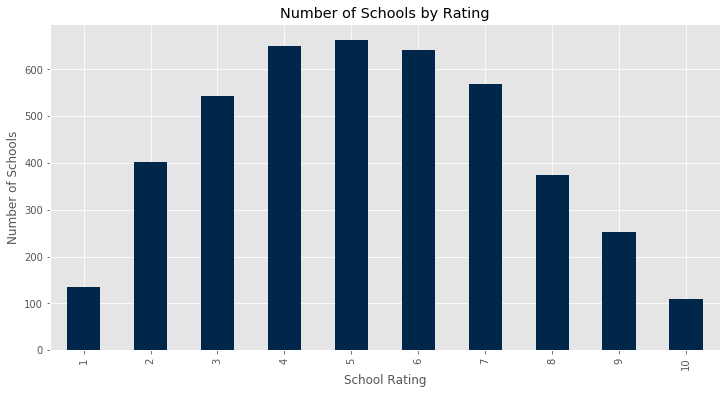

In [114]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['school'].nunique().plot.bar(color='#002649')
plt.title('Number of Schools by Rating')
plt.xlabel('School Rating')
plt.ylabel('Number of Schools')

### Number of Students in Schools by Rating

Text(0, 0.5, 'Number of Students')

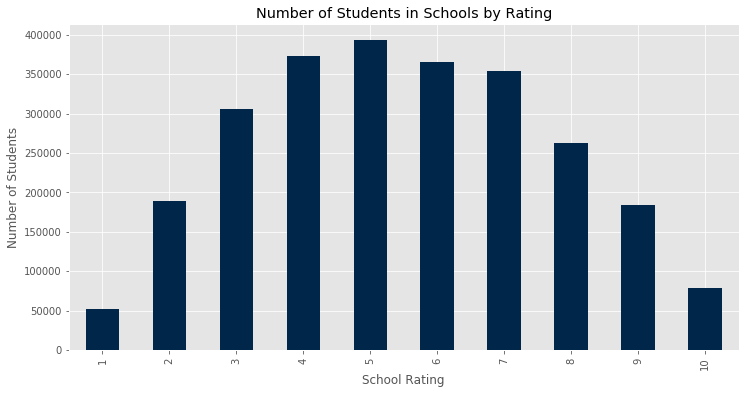

In [113]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['students'].sum().plot.bar(color='#002649')
plt.title('Number of Students in Schools by Rating')
plt.xlabel('School Rating')
plt.ylabel('Number of Students')

### Histogram of Ratings (not particularly useful)

Text(0.5, 1.0, 'Histogram of GreatSchools Ratings')

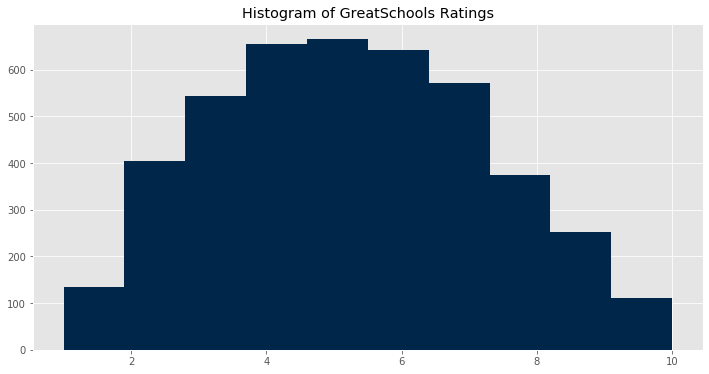

In [74]:
plt.figure(figsize=(12,6))
plt.hist(gs_income_demo['rating'], color='#002649')
plt.title('Histogram of GreatSchools Ratings')

Now that I knew the distribution of ratings was mostly normal, I wanted to see average incomes and racial breakdowns for schools rated in each category.

### Mean Household Income by GreatSchools Rating

Text(0, 0.5, 'Avg Household Income ($)')

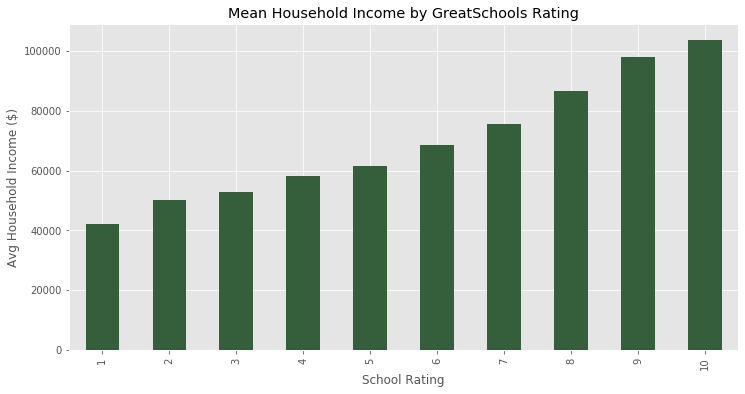

In [112]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['income_per_household'].mean().plot.bar(color='#355e3b')
plt.title('Mean Household Income by GreatSchools Rating')
plt.xlabel('School Rating')
plt.ylabel('Avg Household Income ($)')

### Household Income Distributions Acorss School Ratings (No Outliers)

Text(0, 0.5, 'Distribution of Household Income')

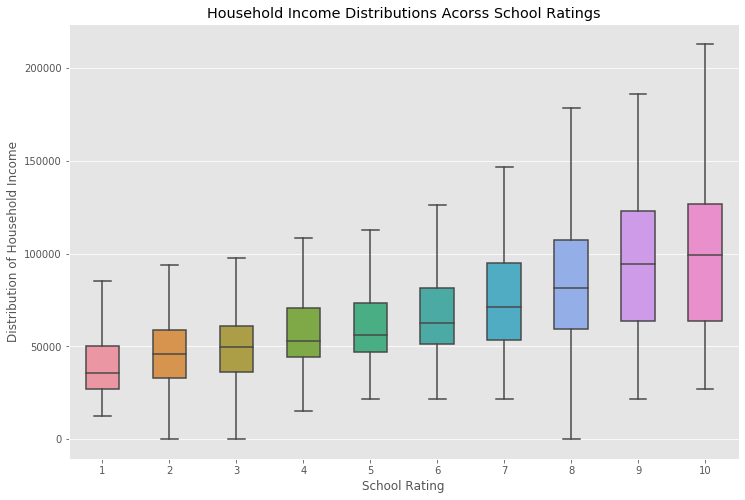

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['income_per_household'],
            fliersize=1, width=.5, showfliers=False)
plt.title('Household Income Distributions Acorss School Ratings')
plt.xlabel('School Rating')
plt.ylabel('Distribution of Household Income')

### Percentage African American by GreatSchools Rating

Text(0, 0.5, 'Percent of Zip Code is African American')

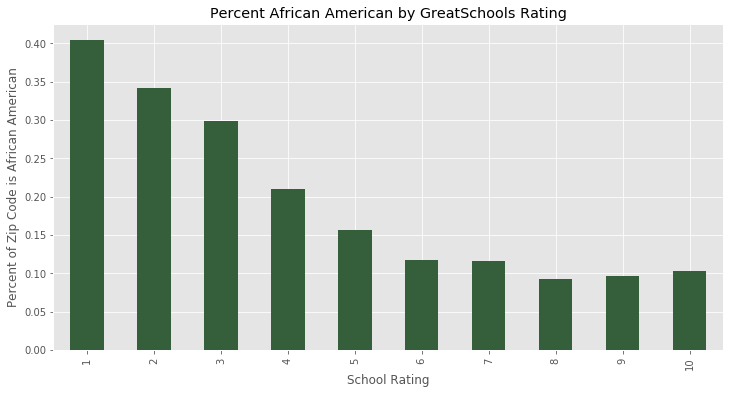

In [110]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['per_african_american'].mean().plot.bar(color='#355e3b')
plt.title('Percent African American by GreatSchools Rating')
plt.xlabel('School Rating')
plt.ylabel('Percent of Zip Code is African American')

### Distribution of School Ratings: Percentage of Population is African American (No Outliers)

Text(0, 0.5, 'Percent of Zip Code is African American')

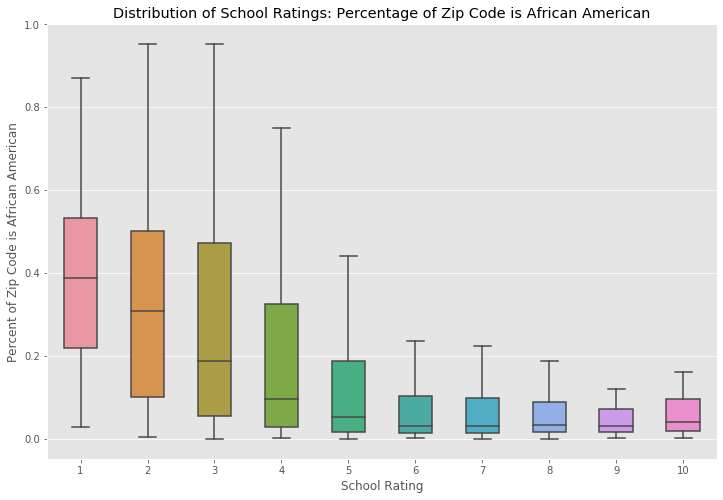

In [109]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_african_american'],
            fliersize=1, width=.5, showfliers=False)
plt.title('Distribution of School Ratings: Percentage of Zip Code is African American')
plt.xlabel('School Rating')
plt.ylabel('Percent of Zip Code is African American')

### Percentage White by GreatSchools Rating

Text(0, 0.5, 'Percent of Zip Code is White')

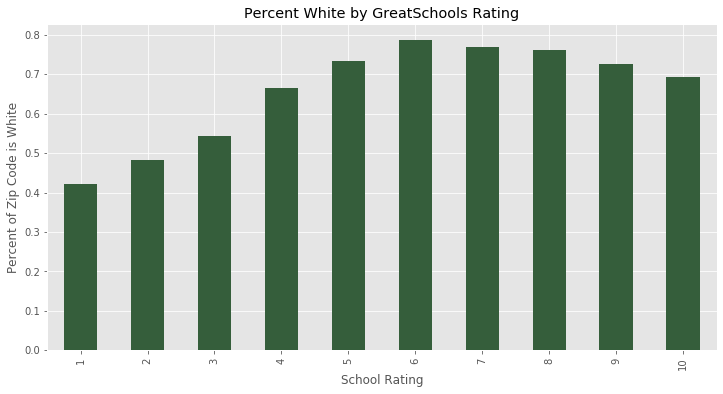

In [108]:
plt.figure(figsize=(12,6))
gs_income_demo.groupby('rating')['per_white'].mean().plot.bar(color='#355e3b')
plt.title('Percent White by GreatSchools Rating')
plt.xlabel('School Rating')
plt.ylabel('Percent of Zip Code is White')

### Distribution of School Ratings: Percentage of Population is White (No Outliers)

Text(0, 0.5, 'Percent of Zip Code is African American')

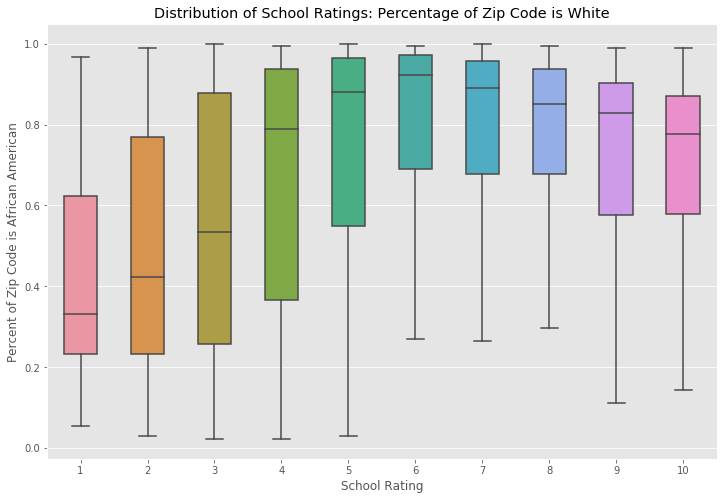

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_white'],
            fliersize=1, width=.5, showfliers=False)
plt.title('Distribution of School Ratings: Percentage of Zip Code is White')
plt.xlabel('School Rating')
plt.ylabel('Percent of Zip Code is African American')

Based on these graphs, it appears that there's a positive relationship between a the average household income of a zip code and the ratings of schools within the zip code. There also appears to be a negative relationship between school ratings and zip codes with a higher percentage of African American residents. The relationship between school ratings and the percent of a zip code that identifies as white is less clear, but there does seem to be a positive correlation. I'll explore this correlation below.

### Correlation of Variables on School Ratings

In [116]:
from sklearn.linear_model import LinearRegression

In [118]:
# First, created a separate dataframe that included only relevant variable types of floats or integers
gs_income_demo_lr = gs_income_demo.drop(['school','type','grades','city','state',\
                               'returns','single_returns','joint_returns',\
                               'agi','total_income','returns_itemized','asian','african_american','white'],\
                              axis=1)

In [121]:
# Then I checked the Pearson correlation between all variables and scool ratings
corr_pearson = gs_income_demo_lr.corr(method='pearson')['rating'][:-1].sort_values(ascending=False)
print(corr_pearson)

rating                     1.000000
income_per_household       0.451477
per_joint                  0.451436
median_age                 0.321336
income_per_return          0.320401
agi_per_return             0.319583
per_white                  0.294155
per_asian                  0.208656
students                   0.161474
annual_business_payroll    0.003114
zip                       -0.034384
households                -0.110228
population                -0.123344
per_single                -0.182915
per_african_american      -0.348602
Name: rating, dtype: float64


As is noted in the table of correlations above, the most highly correlated variables and GreatSchools' ratings was income_per_household, followed closely by the percent of tax returns for a given zip code that were joint filings, which acts as a proxy for the percent of married households in the zip code. Aside from median age, the top-5 correlation values all had to do with income. Income per return and AGI (adjusted gross income) per return are income measurements taken from the IRS Income Data I downloaded.

## Charter vs District School

All of the insights gleaned from the analysis above are not particularly interesting. They reinforce what other analyses by folks much more talented and excating than me have already found: the quality of a child's education is influenced by the level of affluence or deprivation in their local community. However, the data became more interesting once I started to dig into the ratings of district vs charter schools.

### Household Income Distributions by School Rating by Distric or Charter (No Outliers)

Text(0, 0.5, 'Income Distribution')

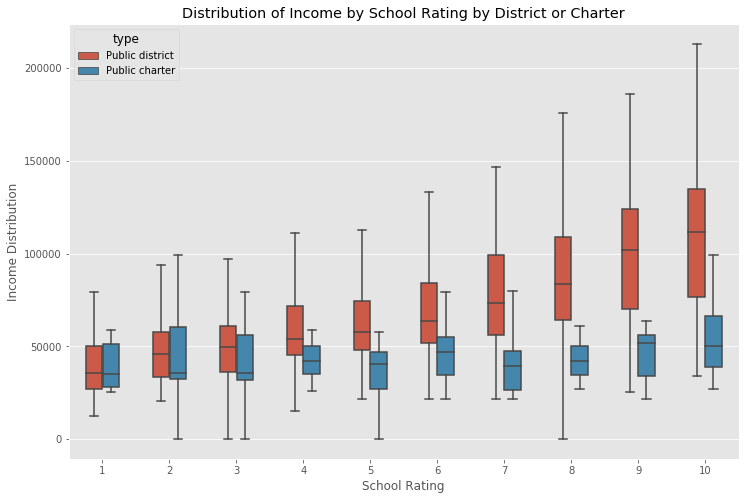

In [124]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['income_per_household'], hue=gs_income_demo['type'],
            fliersize=1, width=.5, showfliers=False)
plt.title('Distribution of Income Across School Ratings by District or Charter')
plt.xlabel('School Rating')
plt.ylabel('Distribution of Income')

When breaking up the income distribution box plot used in the analysis above into the categories of 'Public district' and 'Public charter' and interesting trend emerges: high quality district schools seem to serve zip codes with relatively high incomes while charter schools seem to be the only high quality schools located in low-income zip codes.

### Distribution of African American Population Across School Ratings by District or Charter (No Outliers)

Text(0, 0.5, 'Percent of Zip Code is African American')

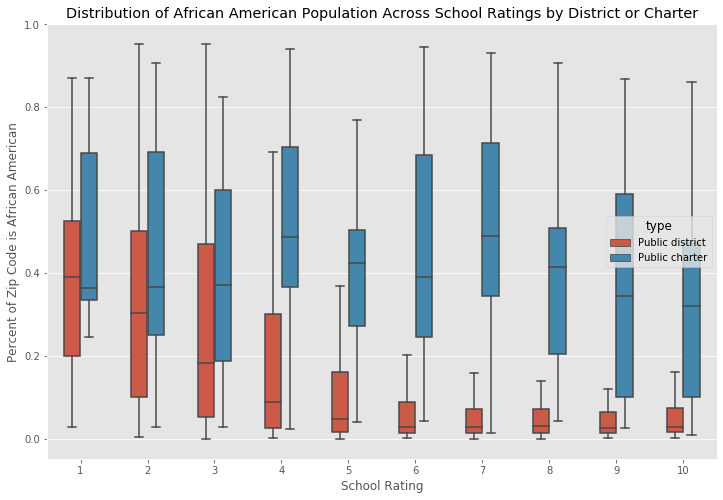

In [126]:
plt.figure(figsize=(12,8))
sns.boxplot(x=gs_income_demo['rating'], y=gs_income_demo['per_african_american'],\
            hue=gs_income_demo['type'], fliersize=1, width=.5, showfliers=False)
plt.title('Distribution of African American Population Across School Ratings by District or Charter')
plt.xlabel('School Rating')
plt.ylabel('Percent of Zip Code is African American')

The plot above shows the distrubtion of high quality district and charter schools relative to the percent of the zip code that identifies as African American. Charter schools seem to significantly outperform district schools in zip codes that have a higher proportion of African American residents. 

# Conclusion

Below is a short summary of the conclusions I've drawn from my analysis:

- Based on my analysis, it appears that GreatSchools' ratings are, for the most part, normally distributed.

- There is a moderate positive correlation between income and school ratings. This is not suprising as the acheivement gap correlates to levels of wealth. The more affluent a zip code, the more likely that the schools in that zip code are higher performing than schools in a zip code that is less wealthy.

- The achievement gap based on income also shows itself in GreatSchools' ratings when you look at the data through the lens of race. The percent of a zip code's population that identifies as African Amercian is negatively correlated, though weakly, to the quality of schools in that zip code (-0.37 Pearson correlation). Conversely, the percent of a zip code's population that identifies as White is positively correlated to the quality of schools in that zip code, though weakly (0.29 Pearson correlation). These conclusions speak to structural problems within our society and shed no new light on the acheivement gap.

- The findings that are most interesting to me are the differences in ratings for charter and district schools when viewed through the lenses of income and race. If you area a student in a high performing school in an affluent district, you likely attend a district school. However, if you're a student in a high performing school in a low-income zip code, you're likely to attend a charter school. And, if you live in a zip code with a population that is 20% or higher African American, the only high quality schools are likely to be charter schools.

- A political debate over which type of school serves studnets best, district or charter, has been going on for over a decade. Legislation that imposes new caps on the number of charter schools was recently signed by Governor Cuomo. Education advocates on both the right and left argue that charter schools take funding from district schools without producing sustanatively different student outcomes. While a much more detailed analysis that looks at more than simple demographic factors and ratings given to schools by a website is neeeded to understand whether or not charter schools are better or worse than district schools, my analysis suggests that charter schools are serving a vital function in low-income communities and African American communities. Normal district schools in these zip codes are rated much lower that charter schools in these zip codes, and any legistation that seeks to curb their expansion seems to limit the opportunities for students that need them the most.